# Shor's Algorithm Workshop


## Introduction

Shor's algorithm, proposed by Peter Shor in 1994, is a quantum algorithm for integer factorization. Given an integer $N$, it finds its prime factors with polynomial time complexity, which is significantly faster than the best-known classical algorithms that run in super-polynomial time. This efficiency presents a threat to RSA encryption, which relies on the difficulty of factorization.

This workshop introduces the fundamentals of Shor's algorithm, explores its quantum mechanics, and demonstrates its implementation using quantum circuits.


# Modular arithmetic

Consider $ N, a \in \mathbb{N}$ and $ a \lt N$

$ a \mod N$ is the remainder or residue of the quoatient $a/N$

## Examples:


In [1]:
%pip install matplotlib numpy jupyterlab


   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 11.2 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/12.3 MB 9.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.2/12.3 MB 9.4 MB/s eta 0:00:01
   ----------------------- ---------------- 7.1/12.3 MB 9.3 MB/s eta 0:00:01
   ---------------------------- ----------- 8.7/12.3 MB 8.8 MB/s eta 0:00:01
   ---------------------------------- ----- 10.7/12.3 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 9.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/10.2 MB 8.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.2 MB 8.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.7/10.2 MB 8.2 MB/s eta 0:00:01
   -------------------------- ------------- 6.8/10.2 MB 8.7 MB/s eta 0:00:01
   -------

### 1. Basic Modulo Operation

The modulo operation finds the remainder after division of one number by another.

In [5]:
remainder = 10 % 3
print("10 mod 3 =", remainder)

10 mod 3 = 1


### 2. Modulo with Negative Numbers

Modulo operations involving negative numbers adhere to the sign of the divisor.

In [6]:
negative_modulo = -1 % 371  # Remainder when -10 is divided by 3
print("-1 mod 371 =", negative_modulo)

-1 mod 371 = 370


In [7]:
negative_modulo = 0 % 371  # Remainder when -10 is divided by 3
print("0 mod 371 =", negative_modulo)

0 mod 371 = 0


## Congruence

We write $a \equiv b \text{ (mod N)}$ si y solo si $(a \mod N) = (b \mod N)$

or equivalently, $a-b= k N$ with k an integer, i.e., $N|(a-b)$, N is a divisor
of $a-b$

### Examples:
$17 \equiv 2 \text{ (mod 15)}$

$534 \equiv 1479 \text{ (mod 15)}$

$3350 \equiv 2237 \text{ (mod 371)}$

### Exercises

Show that:

$1977 \equiv 1 \text{ (mod 247)}$

$16183 \equiv 15442 \text{ (mod 247)}$ 

In [14]:
print(1977 % 247, "es equivalente a", 1 % 247)
print(16183 % 247, "es equivalente a", 15442 % 247)

1 es equivalente a 1
128 es equivalente a 128



# Modular exponentiation

Suppose we have a number $N$ and we want to know a factor of $N$. To facilitate
the task of finding factors of $N$ suppose that $N = 2^n$.

Let us randomly choose an integer $a$ that is less than $N$ such that $a$ does
not have common factors with N (apart from 1).

You can test if $a$ and $N$ have common factors using $GCD(a,N)$. If
$GCD(a,N) \neq 1$ we have found a factor of $N$ and we are done.

If $GCD(a,N) = 1$ $a$ and $N$ are called coprimes. If $a$ is coprime with $N$ we
can use $a$ for the nest step oof the algorithm.

We now need to compute the following function:

$f_{a,n}= a^x \mod N$ for al integers between $0$ and $N$ 

## Example
Consider N=15 and a=2

Periodo:  4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 2 4 8 1 2 4 8 1 2 4 8 1 2 4]


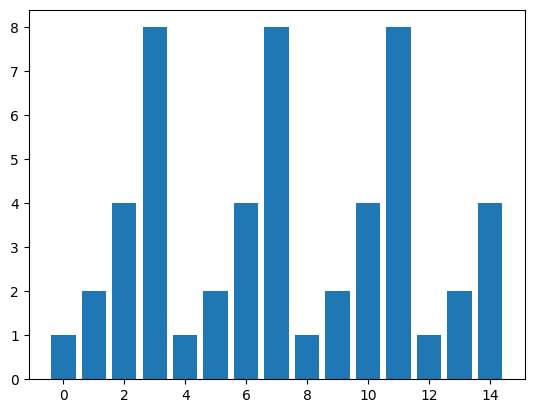

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def powersAModuloN(a,N):
    powers = []
    for i in range(N):
        powers.append(a**i % N)
    return powers

def periodoDeF(a,N):
    powers =powersAModuloN(a,N)
    return powers.index(1,1)


def computeAndDrawPowersAModuloN(a,N):
    powers_a_N = powersAModuloN(a,N)
    print("Periodo: ", periodoDeF(a, N))
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("      x   =", xpoints)
    print(" f(x)_a_N =", ypoints)
    plt.bar(xpoints, ypoints)
    plt.show()

N = 15
a = 2
computeAndDrawPowersAModuloN(a,N)

Periodo:  2
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


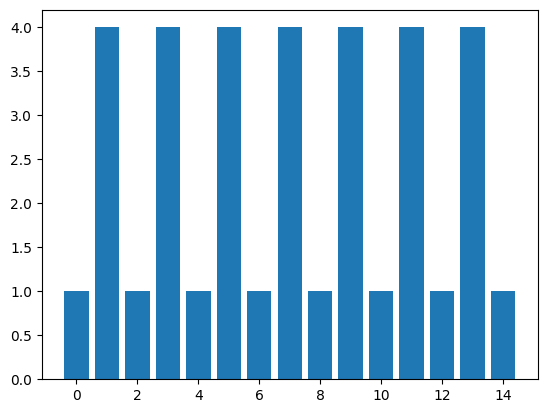

In [9]:
N = 15
a = 4
computeAndDrawPowersAModuloN(a,N)

Periodo:  4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [ 1 13  4  7  1 13  4  7  1 13  4  7  1 13  4]


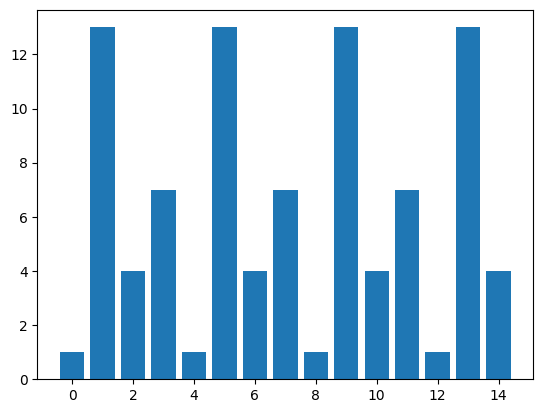

In [10]:
N = 15
a = 13
computeAndDrawPowersAModuloN(a,N)

Periodo:  156
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

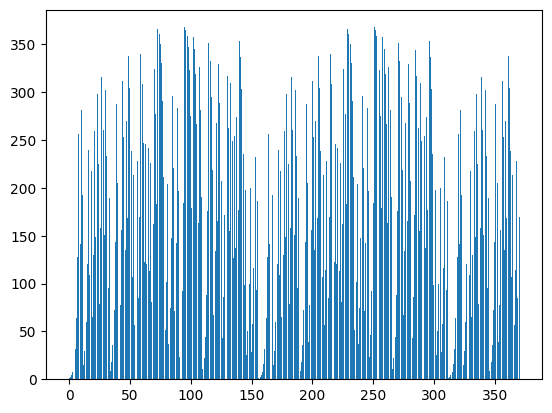

In [11]:
N = 371
a = 2
computeAndDrawPowersAModuloN(a,N)

## A more efficient way of computing $f_{a,N}(x)$

### Can we compute $fa_{a,N}(x)$ more efficiently?

if $a \equiv a' \text{ (mod N)}$ and $a \equiv b' \text{ (mod N)}$, then

$$a \times b \equiv a' \times b' \text{ (mod N)}$$ 

and

$$ (a \times b) \mod N = ((a \mod N) \times (b\mod N)) \mod N$$

From this we can write:

$$a^x \mod N = a^{x-1} \times a \mod N = ((a^{x-1} \mod N) \times (a \mod N))
\mod N$$

where $a \mod N = a$ because $a < N$, then we can simplify further:

$$f_{a,N}(x)=a^x \mod N = ((a^{x-1} \mod N) \times a) \mod N$$

with 
$$f_{a,N}(0) = a^0 \mod N = 1$$

In [9]:
def powersAModuloNRecursive(a,N):
    powers = []
    powers.append(1)

    for i in range(1, N):
        powers.append((powers[i-1] * a) % N)
    return powers

def computeAndDrawRecursivelyPowersAModuloN(a,N):
    powers_a_N = powersAModuloN(a,N)
    print("Periodo: ", periodoDeF(a, N))
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("      x   =", xpoints)
    print(" f(x)_a_N =", ypoints)
    plt.bar(xpoints, ypoints)
    plt.show()

Periodo:  78
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 2

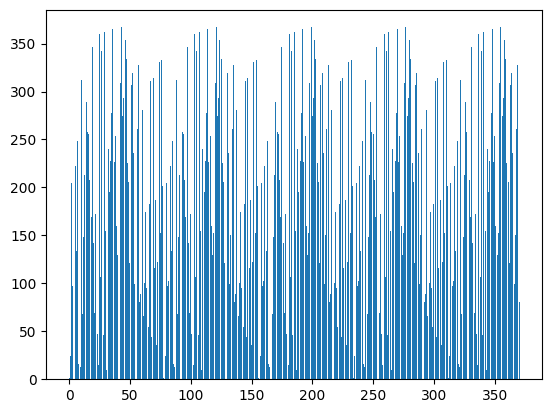

In [10]:
N = 371
a = 24
computeAndDrawRecursivelyPowersAModuloN(a,N)

In [ ]:
N = 371
a = 6
computeAndDrawRecursivelyPowersAModuloN(a,N)

## Finding the period of $f_{a,N}$

What we need is the period of the function, i.e., we need to find the
smallest $r > 0$ such that

$$ f_{a,N}(r) = a^r \mod N = 1$$
we can do this by simple inspection of the figures.

## Example

In [ ]:
N = 371
a = 6

print("Periodo: ", periodoDeF(a, N))

A theorem of number theory says that for any co-prime $a≤ N$, the function
$f_{a, N} will output a 1 for some $r < N$. After this, the sequence of numbers
will repeat. 

If $f_{a, N}(r) = 1$, then

$$ f_{a,N}(x+r) = f_{a,N}(x) $$


## From the Period to factors

We need an even number as period. If the period is not even choose another $a$
and repeat the calculation.

With the information of the period $r$ we can now compute the factors follows:

We know that 

$a^r \equiv 1 \text{ ( mod N)}$

subtract 1 from both sides

$a^r -1 \equiv 0 \text{ ( mod N)}$

Thus, $N$ is a divisor of $a^r -1 $

$ N|(a^r -1)$

We know that $x^2 - y^2 = (x+y)(x-y)$, then we can rewrite

$ N|(\sqrt{a^r} + 1)(\sqrt{a^r} - 1)$

or

$ N|(a^\frac{r}{2} + 1)(a^\frac{r}{2} - 1)$   

Note: If $r$ were odd we could not divide by 2 and get an integer

from this equation we now know that any factor of N is also a factor of $(a^\frac{r}{2} + 1)$
or of $(a^\frac{r}{2} - 1)$ or of both.

So we can find the factors looking at:

$GCD(a^\frac{r}{2} + 1, N)$ 

or

$GCD(a^\frac{r}{2} + 1, N)$

GCD can implement the classical Euclidean algorithm.


**IMPORTANT:** $a^\frac{r}{2} \not\equiv -1 \text{ (mod N)}$ if so choose
another $a$.



## Examples

f_a_N= [1, 24, 205, 97, 102, 222, 134, 248, 16, 13, 312, 68, 148, 213, 289, 258, 256, 208, 169, 346, 142, 69, 172, 47, 15, 360, 107, 342, 46, 362, 155, 10, 240, 195, 228, 278, 365, 227, 254, 160, 130, 152, 309, 367, 275, 293, 354, 334, 225, 206, 121, 307, 319, 236, 99, 150, 261, 328, 81, 89, 281, 66, 100, 174, 95, 54, 183, 311, 44, 314, 116, 187, 36, 122, 331, 153, 333, 201, 1, 24, 205, 97, 102, 222, 134, 248, 16, 13, 312, 68, 148, 213, 289, 258, 256, 208, 169, 346, 142, 69, 172, 47, 15, 360, 107, 342, 46, 362, 155, 10, 240, 195, 228, 278, 365, 227, 254, 160, 130, 152, 309, 367, 275, 293, 354, 334, 225, 206, 121, 307, 319, 236, 99, 150, 261, 328, 81, 89, 281, 66, 100, 174, 95, 54, 183, 311, 44, 314, 116, 187, 36, 122, 331, 153, 333, 201, 1, 24, 205, 97, 102, 222, 134, 248, 16, 13, 312, 68, 148, 213, 289, 258, 256, 208, 169, 346, 142, 69, 172, 47, 15, 360, 107, 342, 46, 362, 155, 10, 240, 195, 228, 278, 365, 227, 254, 160, 130, 152, 309, 367, 275, 293, 354, 334, 225, 206, 121, 307, 319,

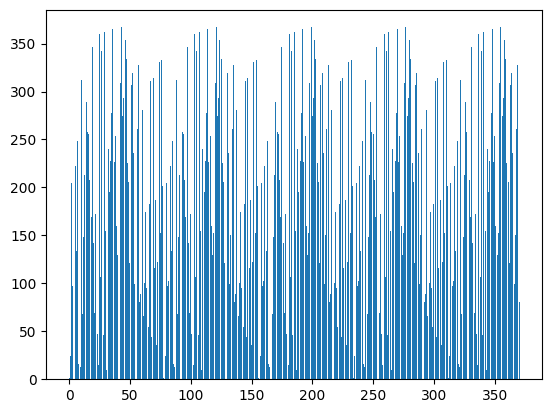

In [12]:
def findPeriod(a, N):
    powers = powersAModuloNRecursive(a, N)
    return powers.index(1,1)

def gcd(a, b):
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

if __name__ == '__main__':
    N = 371
    a = 24
    powers_a_N = powersAModuloNRecursive(a,N)
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("f_a_N=", powers_a_N)
    period = findPeriod(a, N)
    print("period of f_a_N=", period)

    print("a^(period/2) Mod N = ", (a**(period/2)) % N)
    print("(-1) Mod N= ",  (-1) % N)
    print("factor1= ", gcd((a**(period/2)) + 1, N))
    print("factor2= ", gcd((a**(period/2)) - 1, N))

    print((a**(period/2)) +1)
    print("gcd(161,371)=",gcd(161,371))
    print("We can do this because 160 congruent with 24^39")

    plt.bar(xpoints, ypoints)
    plt.show()

## Exercise
Compute the factors of $N=247$ using $a=2$

# The quantum algorithm

$a$ is always less than $N$ so we need $n=log_2 N$ qbits as output.

We need to evaluate $f_{a,N}$ in at least $N^2$ values of $x$, so $m = log_2 N^2
= 2 log_2 N = 2n$

![Shor's algorithm!](images/shoralgorithm.jpg)

$\ket{\psi_0} = \ket{\boldsymbol{0_m}, \boldsymbol{0_n}}$

$\ket{\psi_1} = \frac{1}{\sqrt{2^m}}\sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, \boldsymbol{0_n}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, f_{a,N}\boldsymbol{x}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, a^{\boldsymbol{x}}
\mod N}$

# Shor’s algorithm: 
Input: A positive integer N with n = [log2 N]. 

Output: A factor p of N if it exists. 

Step 1. Use a polynomial algorithm to determine if N is prime or a power of
prime. If it is a prime, declare that it is and exit. If it is a power of a
prime number, declare that it is and exit. 

Step 2. Randomly choose an integer a such that 1 < a< N. Perform Euclid’s
algorithm to determine GCD(a, N). If the GCD is not 1, then return it and exit. 

Step 3. Use quantum circuit (6.166) to find a period r. 

Step 4. If r is odd or if ar ≡ −1 Mod N, then return to Step 2 and choose
another a. 

Step 5. Use Euclid’s algorithm to calculate  and . Return at least one of the nontrivial solutions.


En este codigo se implementa una versión simple del algoritmo Shor , que es un metodo para factorizar números.Se aplica lo visto a lo largo del documento manejando nuevos filtros. Primero , se verifica si el número N es primo o una potencia de un primo utilizando las funciones esPrimo y potenciaPrimo. Si no lo es, calcula el máximo común divisor GCD entre a y N ,como se vió anteriormente , para encontrar un factor sin necesidad de usar computación cuantica .Luego, se calculan las potencias de a módulo N y  determinar el período de la función modular, es decir, cada cuantos x vuelven a repetirse los valores de la función. Si el periodo es par mayor a 0 , se utiliza para calcular factores no triviales de N . Finalmente, se hace uso de un código de barras para mostrar los valores de la función modular.


Intentando factorizar N = 247 con a = 2
Período r encontrado: r = 36
a^(r/2) = 77
gcd(77-1, 247) = 19
gcd(77+1, 247) = 13
Factores no triviales encontrados:
Factor 1: 19
Factor 2: 13


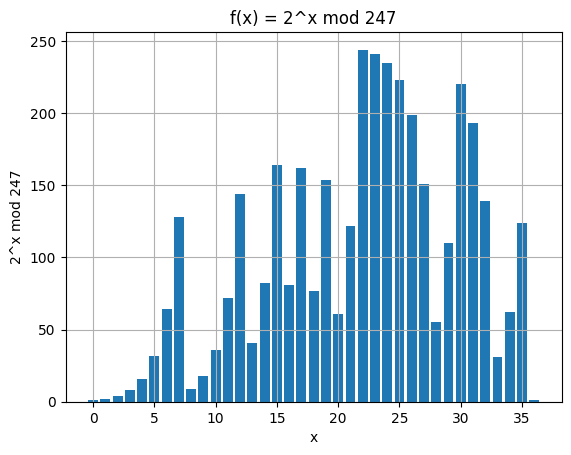

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
 
def esPrimo(N):
    if N <= 1:
        return False
    if N <= 3:
        return True
    if N % 2 == 0 or N % 3 == 0:
        return False
    i = 5
    while i * i <= N:
        if N % i == 0 or N % (i + 2) == 0:
            return False
        i += 6
    return True
 
def PotenciaPrimo(N):
    for base in range(2, int(math.sqrt(N)) + 1):
        exp = 2
        while (result := base**exp) <= N:
            if result == N:
                return True
            exp += 1
    return False
 


def shorNuevo(N, a):
    print(f"Intentando factorizar N = {N} con a = {a}")
 
    if esPrimo(N):
        print(f"{N} es primo.")
        return
    if PotenciaPrimo(N):
        print(f"{N} es potencia de un primo.")
        return
 
    d = gcd(a, N)
    if d != 1:
        print(f"¡Factor encontrado sin cuántica! gcd({a}, {N}) = {d}")
        return d
 
    powers = powersAModuloNRecursive(a, N)
    r = findPeriod(a, N)
    if r is None:
        print("No se encontró  el período.")
        return
 
    print(f"Período r encontrado: r = {r}")
 
    if r % 2 != 0:
        print(f"r = {r} es impar. No sirve. Puedes intentar con otro a.")
        return
    if pow(a, r // 2, N) == N - 1:
        print(f"a^(r/2) ≡ -1 mod N. No sirve.Puedes intentar con otro a.")
        return
 
    x = pow(a, r // 2, N)
    factor1 = gcd(x - 1, N)
    factor2 = gcd(x + 1, N)
 
    print(f"a^(r/2) = {x}")
    print(f"gcd({x}-1, {N}) = {factor1}")
    print(f"gcd({x}+1, {N}) = {factor2}")
 
    print("Factores no triviales encontrados:")
    if 1 < factor1 < N:
        print(f"Factor 1: {factor1}")
    if 1 < factor2 < N:
        print(f"Factor 2: {factor2}")
 
    xpoints = np.arange(len(powers))
    ypoints = np.array(powers)
    plt.bar(xpoints, ypoints)
    plt.title(f"f(x) = {a}^x mod {N}")
    plt.xlabel("x")
    plt.ylabel(f"{a}^x mod {N}")
    plt.grid(True)
    plt.show()
 
if __name__ == "__main__":
    N = 247
    a = 2
    shorNuevo(N, a)


## Further Reading

For those interested in diving deeper into Shor's algorithm and quantum computing, here are some resources:

- Yanofsky, Noson S.; Mannucci, Mirco A.. Quantum Computing for Computer Scientists (English Edition) (p. 217). Cambridge University Press. Kindle Edition. 
- Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information.
- Kaye, P., Laflamme, R., & Mosca, M. (2007). An Introduction to Quantum Computing.
- [Qiskit Documentation](https://qiskit.org/documentation/)


GITHUB: https://github.com/carolina-cepeda/CNYT2